# Adult Income Analysis

## Part 1: Load and Inspect the Data

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np

In [3]:
adult_income = pd.read_csv(r'/Users/andressotelo/Documents/Datasets/adult.csv')
adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Let's investigate if there's missing values and the type of columns

adult_income.info()
adult_income.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


(48842, 15)

#### Let's remove some characters from the column names. Let's work with a clean and clear dataset.

In [5]:
adult_income.rename(columns = {'educational-num':'educational num', 'marital-status':'marital status', 
                               'capital-gain':'capital gain', 'capital-loss':'capital loss', 
                               'hours-per-week':'hours per week', 'native-country':'country'},
                    inplace = True)
adult_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational num',
       'marital status', 'occupation', 'relationship', 'race', 'gender',
       'capital gain', 'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

#### Earlier, when we examined the first 5 rows of the dataset, there were a couple of '?' in the data. Let's investigate further and clean it up.

In [6]:
adult_income.isin(['?']).sum(axis = 0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational num       0
marital status        0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [7]:
# Code below will replace ? with 'nan' values, then drop those rows.

adult_income['workclass'] = adult_income['workclass'].replace('?', np.nan)
adult_income['occupation'] = adult_income['occupation'].replace('?', np.nan)
adult_income['country'] = adult_income['country'].replace('?', np.nan)
adult_income.dropna(how = 'any', inplace = True)
adult_income.shape

(45222, 15)

In [8]:
# Running a loop of value counts to each columns to count unique values.

for c in adult_income.columns:
    print('---- %s---' %c)
    print(adult_income[c].value_counts())

---- age---
36    1283
33    1279
31    1274
35    1272
23    1241
34    1234
37    1229
30    1215
38    1211
28    1198
32    1196
41    1174
39    1169
27    1157
29    1157
40    1144
25    1133
24    1130
42    1113
26    1092
43    1065
46    1062
45    1049
47    1038
44    1035
22    1034
21     935
20     916
19     864
51     835
      ... 
61     394
62     328
64     285
63     280
65     217
66     180
67     180
68     136
69     116
70      96
71      90
72      83
73      82
74      59
75      53
76      46
90      46
77      39
80      29
81      27
78      21
79      20
82      10
83       9
84       9
85       5
88       5
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
---- workclass---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- fnlwgt---
203488    21
125892    18
120277    

In [9]:
# Dropping noisy data.

adult_income.drop(['educational num', 'capital loss', 'capital gain', 'fnlwgt'], axis = 1, inplace = True)

In [10]:
# Check how many catergories are in income.

set(adult_income['income'])

{'<=50K', '>50K'}

In [11]:
# Convert income column to numerical.

adult_income['income'] = adult_income['income'].map({'<=50K':0, '>50K':1}).astype(int)
adult_income.head()

,age,workclass,education,marital status,occupation,relationship,race,gender,hours per week,country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0


## Part 2: Data Visualization

In [12]:
# Import libraries for data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

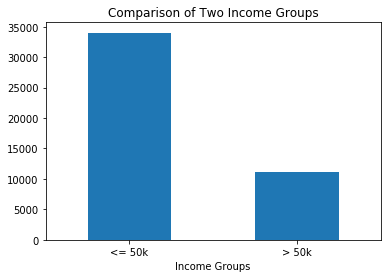

In [13]:
# Compare how many make less than 50k versus more than 50k.

income_groups = adult_income['income'].value_counts()
ax = plt.subplot()
income_groups.plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
ax.set_xticks([0,1])
ax.set_xticklabels(['<= 50k', '> 50k'])
plt.xlabel('Income Groups')
plt.title('Comparison of Two Income Groups')
plt.show()

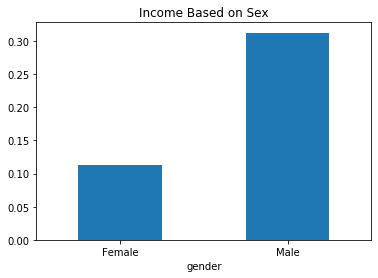

In [14]:
# Compare how much a male makes versus a female.

sex_income = adult_income.groupby('gender')['income'].mean()
ax = plt.subplot()
sex_income.plot(kind = 'bar')
plt.xticks(rotation = 'horizontal')
ax.set_xticks([0,1])
ax.set_xticklabels(['Female', 'Male'])
plt.title('Income Based on Sex')
plt.show()

#### This basically means that males are more likely to have a higher income than females which is unfortunate.

Text(0.5, 0, 'Likelihood of Higher Income')

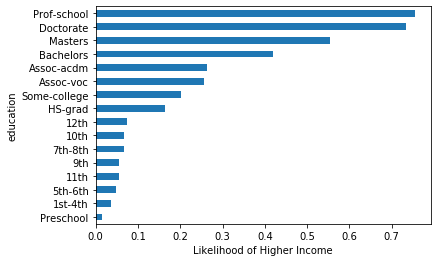

In [16]:
# Let's compare where education puts you in terms of income. 

edu_level = adult_income.groupby('education')['income'].mean().sort_values()
edu_level.plot(kind = 'barh')
plt.xlabel('Likelihood of Higher Income')

#### The more educated you are, the more likely you will earn an income of 50k or greater which makes sense.

Text(0.5, 0, 'Likelihood of Higher Income')

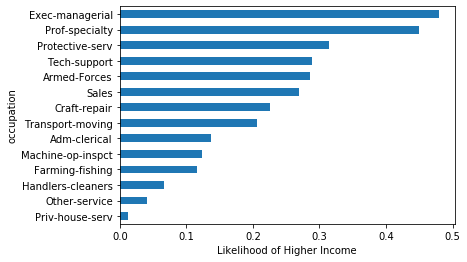

In [17]:
# Let's investigate if the line of work you're in affects your income.

occupation = adult_income.groupby('occupation')['income'].mean().sort_values()
occupation.plot(kind = 'barh')
plt.xlabel('Likelihood of Higher Income')

Text(0.5, 1.0, 'Marital Status vs Higher Income')

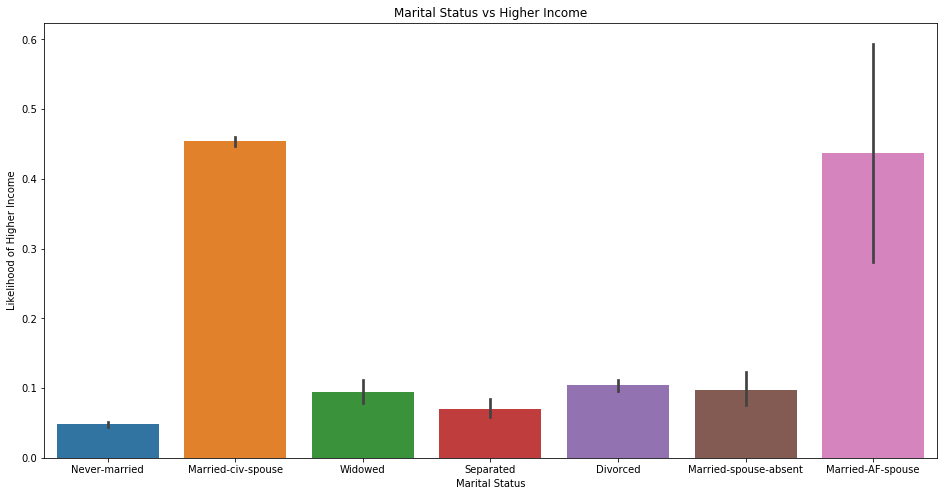

In [18]:
# Does marital status affect income?

plt.figure(figsize = (16,8))
sns.barplot(x = 'marital status', y = 'income', data = adult_income)
plt.xlabel('Marital Status')
plt.ylabel('Likelihood of Higher Income')
plt.title('Marital Status vs Higher Income')

Text(0.5, 1.0, 'Race vs Likelihood of Higher Income')

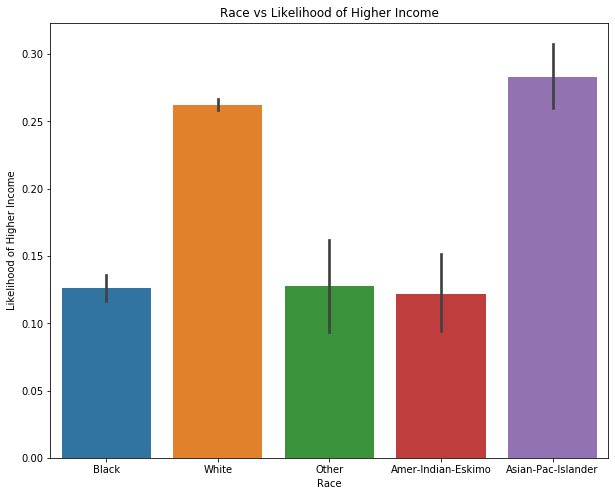

In [19]:
# Does race affect likelihood of higher income?

plt.figure(figsize = (10,8))
sns.barplot(x = 'race', y = 'income', data = adult_income)
plt.xlabel('Race')
plt.ylabel('Likelihood of Higher Income')
plt.title('Race vs Likelihood of Higher Income')

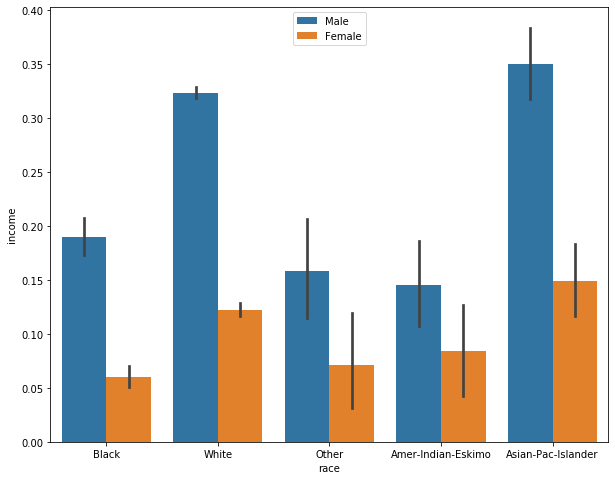

In [20]:
# Let's compare the difference of income of gender within racial groups. 

plt.figure(figsize = (10,8))
sns.barplot(x = 'race', y = 'income', hue = 'gender', data = adult_income)
plt.legend(loc = 'upper center')

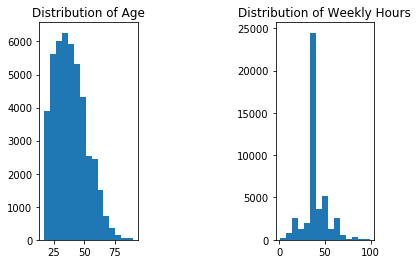

In [21]:
# Distribution of age and hours per week.

plt.subplot(1, 3, 1)
plt.hist(adult_income['age'], bins = 15)
plt.title('Distribution of Age')

plt.subplot(1, 3, 3)
plt.hist(adult_income['hours per week'], bins = 15)
plt.title('Distribution of Weekly Hours')

plt.show()

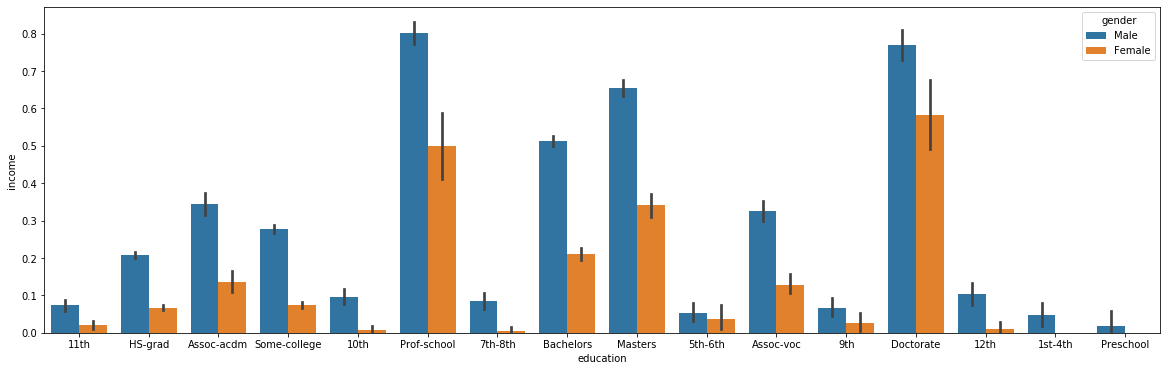

In [22]:
# Let's compare gender and education level.

plt.figure(figsize = (20,6))
sns.barplot(x = 'education', y = 'income', hue = 'gender', data = adult_income)

## Part 3: Machine Learning Modeling

### Logistic Regression

In [15]:
# Before we begin modeling the data, first we need to convert all categorical columns to numerical.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in adult_income:
    if adult_income[col].dtypes == 'object':
        adult_income[col] = le.fit_transform(adult_income[col])
        
adult_income.head()

,age,workclass,education,marital status,occupation,relationship,race,gender,hours per week,country,income
0,25,2,1,4,6,3,2,1,40,38,0
1,38,2,11,2,4,0,4,1,50,38,0
2,28,1,7,2,10,0,4,1,40,38,1
3,44,2,15,2,6,0,2,1,40,38,1
5,34,2,0,4,7,1,4,1,30,38,0


In [20]:
# Split data into train and test sets.

from sklearn.model_selection import train_test_split

X = adult_income[['age', 'education', 'marital status', 'occupation', 'race', 'gender', 'hours per week']]
y = adult_income['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31655, 7)
(31655,)
(13567, 7)
(13567,)


In [21]:
# Implement Logistic Regression.

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
# Use X_test to predict output.

y_pred = logreg.predict(X_test)

In [23]:
# Confusion matrix to check for accuracy.

from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_pred, y_test))
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

[[9584 2739]
 [ 657  587]]
0.749686739883541


#### Let's perfrom 10-fold cross validation to optimize our accuracy score. Let's see if we can obtain a higher score than 75%.

In [24]:
# K-fold Cross Validation where k = 10.

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

scores = []
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)
fold = 0
for train_index, test_index in cv.split(X):
    cv_X_train, cv_X_test = X.iloc[train_index], X.iloc[test_index]
    cv_y_train, cv_y_test = y.iloc[train_index], y.iloc[test_index]
    model = logreg.fit(cv_X_train, cv_y_train)
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_X_train.shape))
    print('CV test shape: {}'.format(cv_X_test.shape))
    fold += 1
    scores.append(accuracy_score(cv_y_test, model.predict(cv_X_test)) * 100)

print(scores)

/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 0
CV train shape: (40699, 7)
CV test shape: (4523, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 1
CV train shape: (40699, 7)
CV test shape: (4523, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 2
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 3
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 4
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 5
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 6
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 7
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 8
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold: 9
CV train shape: (40700, 7)
CV test shape: (4522, 7)
[75.63564006190582, 74.83970815830202, 74.25917735515259, 75.51968155683326, 76.24944714727997, 74.25917735515259, 74.52454666076957, 75.25431225121628, 76.2936753648828, 73.88323750552853]


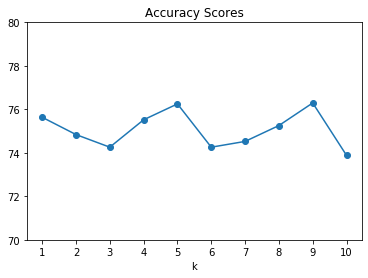

The highest score accuracy score is 76.29%.


In [25]:
# Let's visualize the accuracy scores.

k_folds = range(1,11)
plt.plot(k_folds, scores, marker = 'o')
plt.ylim(70,80)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.title('Accuracy Scores')
plt.show()
print('The highest score accuracy score is ' + str(round(max(scores), 2)) + '%.')

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [27]:
# Confusion Matrix to check for accuracy.

print(confusion_matrix(y_pred_tree, y_test))
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)
print(tree_accuracy)

[[8873 1563]
 [1368 1763]]
0.7839610820372964


In [28]:
# K-fold Cross Validation.

tree_scores = []
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)
fold = 0
for train_index, test_index in cv.split(X):
    cv_X_train, cv_X_test = X.iloc[train_index], X.iloc[test_index]
    cv_y_train, cv_y_test = y.iloc[train_index], y.iloc[test_index]
    model2 = tree.fit(cv_X_train, cv_y_train)
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_X_train.shape))
    print('CV test shape: {}'.format(cv_X_test.shape))
    fold += 1
    tree_scores.append(accuracy_score(cv_y_test, model2.predict(cv_X_test)) * 100)

print(tree_scores)

Fold: 0
CV train shape: (40699, 7)
CV test shape: (4523, 7)
Fold: 1
CV train shape: (40699, 7)
CV test shape: (4523, 7)
Fold: 2
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 3
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 4
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 5
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 6
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 7
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 8
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 9
CV train shape: (40700, 7)
CV test shape: (4522, 7)
[78.95202299358832, 78.17820030952907, 78.7483414418399, 77.75320654577621, 79.14639540026536, 77.26669615214506, 78.65988500663423, 78.30605926581158, 78.0185758513932, 78.30605926581158]


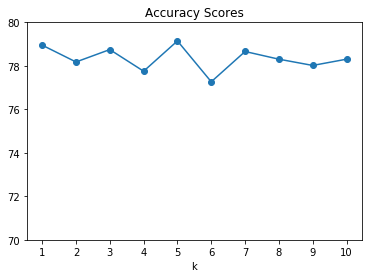

The highest accuracy score is 79.15%.


In [29]:
# Let's visualize the trend for each accuracy score.

k_folds = range(1,11)
plt.plot(k_folds, tree_scores, marker = 'o')
plt.ylim(70,80)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.title('Accuracy Scores')
plt.show()
print('The highest accuracy score is ' + str(round(max(tree_scores), 2)) + '%.')

#### It seems that a decision Tree Model performed better than the Logistic Regression model.

### Support Vector Machine

In [30]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
print(confusion_matrix(y_pred_svm, y_test))
svm_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
print(svm_accuracy)

[[9296 1642]
 [ 945 1684]]
0.8093167244048057


In [32]:
svm_scores = []
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)
fold = 0
for train_index, test_index in cv.split(X):
    cv_X_train, cv_X_test = X.iloc[train_index], X.iloc[test_index]
    cv_y_train, cv_y_test = y.iloc[train_index], y.iloc[test_index]
    model3 = svm.fit(cv_X_train, cv_y_train)
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_X_train.shape))
    print('CV test shape: {}'.format(cv_X_test.shape))
    fold += 1
    svm_scores.append(accuracy_score(cv_y_test, model3.predict(cv_X_test)) * 100)

print(svm_scores)

/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 0
CV train shape: (40699, 7)
CV test shape: (4523, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 1
CV train shape: (40699, 7)
CV test shape: (4523, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 2
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 3
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 4
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 5
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 6
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 7
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 8
CV train shape: (40700, 7)
CV test shape: (4522, 7)


/Users/andressotelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Fold: 9
CV train shape: (40700, 7)
CV test shape: (4522, 7)
[82.40106124253815, 80.54388680079593, 80.80495356037152, 81.77797434763379, 81.24723573639983, 80.34055727554178, 81.09243697478992, 79.98673153471914, 80.89340999557719, 80.7828394515701]


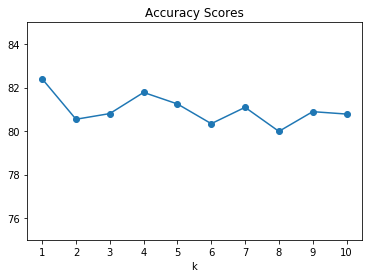

The highest accuracy score is 82.4%.


In [33]:
# Let's visualize the trend for each accuracy score.

k_folds = range(1,11)
plt.plot(k_folds, svm_scores, marker = 'o')
plt.ylim(75,85)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.title('Accuracy Scores')
plt.show()
print('The highest accuracy score is ' + str(round(max(svm_scores), 2)) + '%.')

### K-Nearest_Neighbors

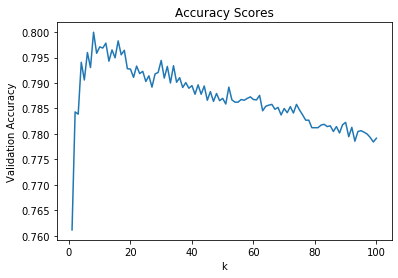

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Before perfoming K-fold Cross Validation, I will loop through 'k' to find the optimal 'k' for K-Nearest Neighbors.

accuracies = []
for k in range(1,101):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plotting the results.

k_list = range(1,101)
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy Scores')
plt.show()

#### The optimal k is 8 with a 79.99% accuracy rate.

In [36]:
knn_scores = []
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)
fold = 0
for train_index, test_index in cv.split(X):
    cv_X_train, cv_X_test = X.iloc[train_index], X.iloc[test_index]
    cv_y_train, cv_y_test = y.iloc[train_index], y.iloc[test_index]
    knn_8 = KNeighborsClassifier(n_neighbors = 8)
    model4 = knn_8.fit(cv_X_train, cv_y_train)
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_X_train.shape))
    print('CV test shape: {}'.format(cv_X_test.shape))
    fold += 1
    knn_scores.append(accuracy_score(cv_y_test, model4.predict(cv_X_test)) * 100)

print(knn_scores)

Fold: 0
CV train shape: (40699, 7)
CV test shape: (4523, 7)
Fold: 1
CV train shape: (40699, 7)
CV test shape: (4523, 7)
Fold: 2
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 3
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 4
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 5
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 6
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 7
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 8
CV train shape: (40700, 7)
CV test shape: (4522, 7)
Fold: 9
CV train shape: (40700, 7)
CV test shape: (4522, 7)
[81.05239885032059, 79.57108114083573, 80.25210084033614, 80.7828394515701, 81.29146395400265, 79.08005307386112, 79.76559044670499, 79.30119416187527, 79.8982750995135, 79.1906236178682]


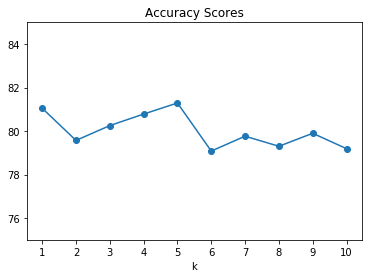

The highest accuracy score is 81.29%.


In [37]:
# Let's visualize the trend for each accuracy score.

k_folds = range(1,11)
plt.plot(k_folds, knn_scores, marker = 'o')
plt.ylim(75,85)
plt.xticks(range(1,11))
plt.xlabel('k')
plt.title('Accuracy Scores')
plt.show()
print('The highest accuracy score is ' + str(round(max(knn_scores), 2)) + '%.')

#### We have used 4 different algorithms to compare accuracy rates. Let's convert all accuracy scores into a data frame so we can get a nice visual and to compare all in one graph.

## Part 4: Results

In [43]:
# Combine accuracy rates from algorithms into one data frame. 

results = {'k-fold':range(1,11), 'Logistic Regression':scores, 'Decision Tree':tree_scores, 
           'SVM':svm_scores, 'KNN':knn_scores}
results_df = pd.DataFrame(results)
results_df

,k-fold,Logistic Regression,Decision Tree,SVM,KNN
0,1,75.635640,78.952023,82.401061,81.052399
1,2,74.839708,78.178200,80.543887,79.571081
2,3,74.259177,78.748341,80.804954,80.252101
3,4,75.519682,77.753207,81.777974,80.782839
4,5,76.249447,79.146395,81.247236,81.291464
5,6,74.259177,77.266696,80.340557,79.080053
6,7,74.524547,78.659885,81.092437,79.765590
7,8,75.254312,78.306059,79.986732,79.301194
8,9,76.293675,78.018576,80.893410,79.898275
9,10,73.883238,78.306059,80.782839,79.190624


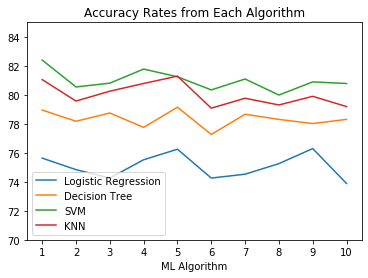

In [50]:
plt.plot(results_df['k-fold'], results_df['Logistic Regression'], label = 'Logistic Regression')
plt.plot(results_df['k-fold'], results_df['Decision Tree'], label = 'Decision Tree')
plt.plot(results_df['k-fold'], results_df['SVM'], label = 'SVM')
plt.plot(results_df['k-fold'], results_df['KNN'], label = 'KNN')
plt.legend()
plt.ylim(70,85)
plt.xticks(range(1,11))
plt.title('Accuracy Rates from Each Algorithm')
plt.xlabel('ML Algorithm')
plt.show()

In [54]:
results_df[['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']].describe()

,Logistic Regression,Decision Tree,SVM,KNN
count,10.000000,10.000000,10.000000,10.000000
mean,75.071860,78.333544,80.987109,80.018562
std,0.851039,0.569757,0.699397,0.794939
min,73.883238,77.266696,79.986732,79.080053
25%,74.325520,78.058482,80.603625,79.368666
50%,75.047010,78.306059,80.849182,79.831933
75%,75.606650,78.726227,81.208536,80.650155
max,76.293675,79.146395,82.401061,81.291464


#### Support Vector Machine performed the best with an average accuracy rate at approximately 81% and 82.4% was the highest accuracy rate with a 10 fold cross validation. Logistic Regression has the lowest average accuracy rate of 75%. One thing I could've done to obtain an even higher accuracy rate is too loop through different values of the Gamma parameter with the Support Vector Machine model.